Use heart.csv to make predictions on heart disease 'AHD'. Apply Logistic Regression.

Notes:
  1. Use standard scaler
  2. Logistic regression can handle categorical target variables (y), but they are typically converted to numerical values. All feature variables (X) must be converted to numerical values. Hence, preprocess the data well.

  GOODLUCK!

<h2>Explanation of each column:</h2>

| Column Name       | Description                                              | Data Type | Notes                               |
|-------------------|----------------------------------------------------------|-----------|-------------------------------------|
| Unnamed: 0               | Index or ID                                       | Integer   | to be dropped
| Age               | Age of the patient                                       | Integer   | Years                               |
| Sex           | Gender of Patient                                       | Integer   | 0=Female, 1=Male                       |
| ChestPain | Level typical, asymptomatic, nonanginal, or nontypical                 | Object   | 1=typical, 2=asymptomatic, 3=nonanginal, 4=nontypical after conversion to numeric                              |
| RestBP          | Pressure in arteries when heart is at rest between heartbeats                                     | Integer   | Second number recorded when measuring blood pressure
| Chol | Fat-like substance that's found in all cells in the body | Integer   | mg/dL                          |
| Fbs | Fasting blood sugar > 120 mg/dl       | Integer   | 0=False; 1=True                       |
| RestECG         | Resting electrocardiographic measurement                              | Integer     | Values 0, 1, 2                    |
| MaxHR  | Maximum heart rate achieved                   | Integer     | Max heart rate                               |
| ExANG     | Exercise induced angina                       | Integer   | 0=No, 1=Yes                              |
| Oldpeak               | ST depression induced by exercise relative to rest                                    | Float   | relates to positions on the ECG plot                  |
| Slope           | the slope of the peak exercise ST segment                                           | Integer   | values 0, 1, 2                       |
| Ca              | number of major vessels (0-3) colored by flourosopy                                  | Float   | 0.  3.  2.  1. nan                               |
| Thal       | screen for thalassemia                            | Object   | 1=normal; 2=fixed defect; 3=reversable after conversion to numeric defect                       |                           |
| AHD       | Alveolar Hydatid Disease                            | Object   | 0=No, 1=Yes after conversion to numeric                    |


Visual inspection of the data.

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a DataFrame
df = pd.read_csv('Heart.csv')

In [ ]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


Check Unique Values

In [ ]:
# Check for unique values (Store expected to have unique identifier; Year, Month, day, WeekOfYear derived from Date
# are used for time-series analysis, trends, patterns, etc so need to ensure uniqueness here. Other columns are
# continuous or categorical that do not require unique check)
columns_to_check_unique = ['ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']
for col in columns_to_check_unique:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print()

Unique values in 'ChestPain':
['typical' 'asymptomatic' 'nonanginal' 'nontypical']

Unique values in 'RestBP':
[145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]

Unique values in 'Chol':
[233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 223 160 394 184 315 409 244 195 196 126 313 259 200
 262 215 228 193 271 210 327 149 295 306 178 237 218 242 319 166 180 311
 278 342 169 187 157 176 241 131]

Unique values in 'Fbs':
[1 0]

Unique va

Identify and handle missing values

In [ ]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [ ]:
# Handle missing values in 'Ca'
median_imputer = SimpleImputer(strategy='median') #SimpleImputer from scikit-learn replaces NaN with median
df['Ca'] = median_imputer.fit_transform(df[['Ca']]) #Assigns back to Ca column in original dataframe


In [ ]:
# Handle missing values in 'Thal'
mode_imputer = SimpleImputer(strategy='most_frequent')
df[['Thal']] = mode_imputer.fit_transform(df[['Thal']])

In [ ]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

Convert to numerical the objects - ChestPain, Thal, and AHD

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          303 non-null    float64
 13  Thal        303 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [ ]:
# Convert 'AHD' to numerical values (0=No, 1=Yes)
df['AHD'] = df['AHD'].map({'No': 0, 'Yes': 1})

# Map 'Thal' to numerical values (1=normal, 2=fixed, 3=reversable)
df['Thal'] = df['Thal'].map({'normal': 1, 'fixed': 2, 'reversable': 3})

# Map 'ChestPain' to numerical values (1=typical, 2=asymptomatic, 3=nonanginal, 4=nontypical)
df['ChestPain'] = df['ChestPain'].map({'typical': 1, 'asymptomatic': 2, 'nonanginal': 3, 'nontypical': 4})

# Display updated DataFrame information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    int64  
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          303 non-null    float64
 13  Thal        303 non-null    int64  
 14  AHD         303 non-null    int64  
dtypes: float64(2), int64(13)
memory usage: 35.6 KB
None


In [ ]:
# Verify the mappings
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2,0
1,2,67,1,2,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,3,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,4,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,3,1
299,300,68,1,2,144,193,1,0,141,0,3.4,2,2.0,3,1
300,301,57,1,2,130,131,0,0,115,1,1.2,2,1.0,3,1
301,302,57,0,4,130,236,0,2,174,0,0.0,2,1.0,1,1


Save processed DataFrame to a CSV File

In [ ]:
# Save the processed DataFrame to a CSV file
df.to_csv('processed_heart.csv', index=False)


Separate features and target; split into training and testing sets.

In [ ]:
# Separate features and target
X = df.drop(columns=['Unnamed: 0', 'AHD'])
y = df['AHD']

model = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 42
)

X_train.shape

X_test.shape

(61, 13)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
std = StandardScaler()

# Fit scaler on training data and transform training data
X_train_scaled = std.fit_transform(X_train)

# Use same scaler to transform test data
X_test_scaled = std.transform(X_test)


In [ ]:
X_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
132,29,1,4,130,204,0,2,202,0,0.0,1,0.0,1
202,57,1,3,150,126,1,0,173,0,0.2,1,1.0,3
196,69,1,1,160,234,1,2,131,0,0.1,2,1.0,1
75,65,0,3,160,360,0,2,151,0,0.8,1,0.0,1
176,52,1,2,108,233,1,0,147,0,0.1,1,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54,1,4,192,283,0,2,195,0,0.0,1,1.0,3
71,67,1,2,125,254,1,0,163,0,0.2,2,2.0,3
106,59,1,2,140,177,0,0,162,1,0.0,1,1.0,3
270,61,1,2,140,207,0,2,138,1,1.9,1,1.0,3


In [ ]:
X_train_scaled

array([[-2.83850353,  0.72250438,  1.65027399, ..., -0.96343165,
        -0.71586852, -0.84923193],
       [ 0.24135234,  0.72250438,  0.51571062, ..., -0.96343165,
         0.40181007,  1.25860528],
       [ 1.56129057,  0.72250438, -1.75341612, ...,  0.65566876,
         0.40181007, -0.84923193],
       ...,
       [ 0.46134205,  0.72250438, -0.61885275, ..., -0.96343165,
         0.40181007,  1.25860528],
       [ 0.68133175,  0.72250438, -0.61885275, ..., -0.96343165,
         0.40181007,  1.25860528],
       [ 0.24135234, -1.38407465, -0.61885275, ..., -0.96343165,
         0.40181007, -0.84923193]])

Training

In [ ]:
model.fit(X_train_scaled, y_train) #training

LogisticRegression()

In [ ]:
y_pred_train = model.predict(X_train_scaled)

#OBJECTIVE - we need the prediction to evaluate the errors in the training phase.

In [ ]:
y_pred_train

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0])

Testing:

Testing our trained model to a new and unseen data.

In [ ]:
y_pred = model.predict(X_test_scaled) #direct predicting
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print out the metrics in sentence form
print(f"Model evaluation on test data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Model evaluation on test data:
Accuracy: 0.8525
Precision: 0.8966
Recall: 0.8125
F1-score: 0.8525


Accuracy: .8525 This indicates around 85.25% of the predictions were correct.

Precision: 0.8966 The model correctly identified 89.66% of the patients predicted to have heart disease.

Recall: .08125 The model captured 81.25% of all actual cases of heart disease.

F1-score: .08525 This metric (0.8525) balances both precision and recall, providing a comprehensive measure of the model's effectiveness.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[26,  3],
       [ 6, 26]])

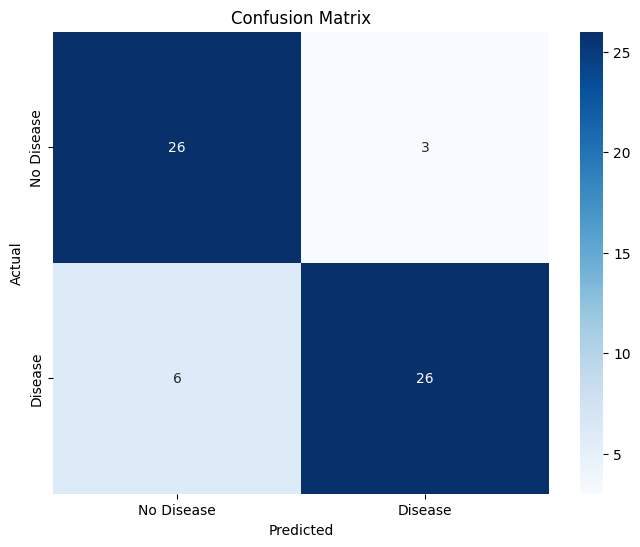

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define labels for the confusion matrix
labels = ['No Disease', 'Disease']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

True Negataives (TN): 26 Top Left

These are instances that were correctly predicted as "No Disease".

False Positives (FP): 3

These are instances that were incorrectly predicted as "Disease" (the actual class is "No Disease").

False Negatives (FN): 6

These are instances that were incorrectly predicted as "No Disease" (the actual class is "Disease").

True Positives (TP): 26 Bottom Right

These are instances that were correctly predicted as "Disease".

Summary

 The model shows promising performance in predicting heart disease based on the evaluation metrics and confusion matrix. It effectively balances between correctly identifying positive cases (heart disease) and negative cases (no heart disease), but there is room for improvement, especially in reducing false negatives and false positives.

Save model in case I need it for future lab.

In [ ]:
from joblib import dump

# Trained LogisticRegression model
dump(model, 'trained_logistic_model.joblib')

['trained_logistic_model.joblib']